<a href="https://colab.research.google.com/github/gmsmoreno/GIS_Programming/blob/main/projeto_mapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
     \ 133.1 MB 1.4 MB/s
     |████████████████████████████████| 6.3 MB 4.3 MB/s 
     |████████████████████████████████| 219 kB 51.3 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759597 sha256=fdf0ddf2dcff0a4b681ec1b85cc18c80ac4ebec5b98c49e87225c0f9b29bbcf6
  Stored in directory: /tmp/pip-ephem-wheel-cache-90b_4lub/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any

In [ ]:
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
pasta = "/content/drive/MyDrive/Colab Notebooks"
dados = pasta + "/focos48h_Brasil.csv"
dados = pd.read_csv(dados)
dados = dados[['latitude', 'longitude']]
#dados.head()
dados_mes = pasta + "/focos_abertos_mensal_202108.csv"
dados_mes = pd.read_csv(dados_mes)
dados_mes = dados_mes[['lat', 'lon']]
dados_mes.head()

,lat,lon
0,-13.76664,142.00392
1,50.48000,-95.04000
2,50.48000,-94.94000
3,50.46000,-94.63000
4,50.46000,-94.60000


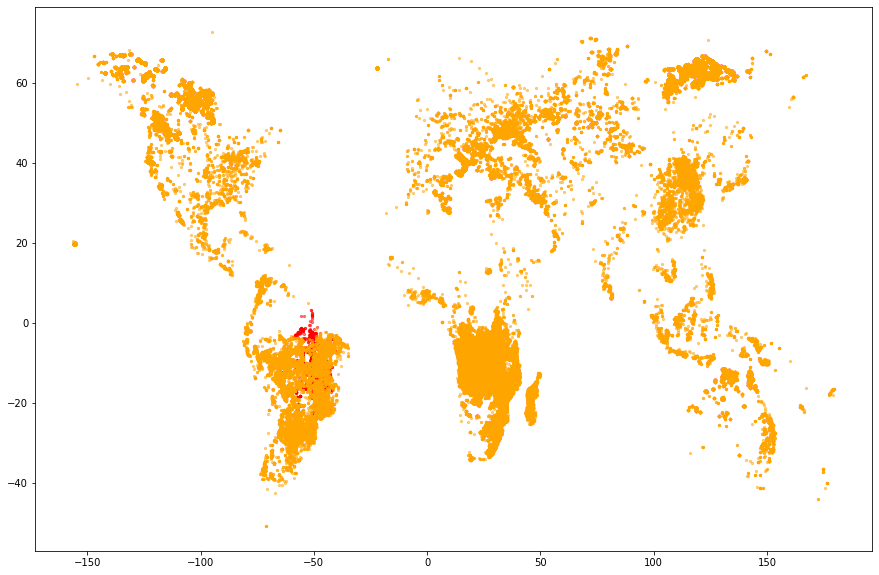

In [ ]:
plt.figure(figsize = (15, 10))
plt.scatter(dados['longitude'].values,
            dados['latitude'].values,
            s = 5, c = 'red',
            alpha = 0.5, zorder = 5)
plt.scatter(dados_mes['lon'].values,
            dados_mes['lat'].values,
            s = 5, c = 'orange',
            alpha = 0.5, zorder = 5)

In [ ]:
def plot_map(lat1, lat2, lon1, long2, xmap, ymap):
  plt.figure(figsize = (xmap, ymap))
  map = Basemap(projection = 'cyl', resolution = 'h',
                llcrnrlat = lat1, urcrnrlat = lat2,
                llcrnrlon = lon1, urcrnrlon = lon2)
  map.drawcoastlines()
  map.fillcontinents(color = 'beige', lake_color = 'lightskyblue')
  map.drawmapboundary(fill_color = 'aqua')
  map.drawrivers(linewidth = 0.2, color = 'blue')
  map.drawcountries(linewidth = 0.7)
  map.drawparallels(np.arange(lat1, lat2 + 0.5, 10), labels = [1, 0, 0, 0])
  map.drawmeridians(np.arange(lon1, lon2 + 0.5, 10), labels = [0, 0, 0, 1])
  return map

In [ ]:
multiplot = 5
lat1 = dados['latitude'].min() - multiplot if dados['latitude'].min() < 0 else dados['latitude'].min() + multiplot
lat2 = dados['latitude'].max() - multiplot if dados['latitude'].max() < 0 else dados['latitude'].max() + multiplot
lon1 = dados['longitude'].min() - multiplot if dados['longitude'].min() < 0 else dados['longitude'].min() + multiplot
lon2 = dados['longitude'].max() - multiplot if dados['longitude'].max() > 0 else dados['longitude'].max() + multiplot

lat1, lat2 = round(lat1, 4), round(lat2, 4)
lon1, lon2 = round(lon1, 4), round(lon2, 4)

print(dados['latitude'].min(), dados['latitude'].max())
print(lat1, lat2)
print(dados['longitude'].min(), dados['longitude'].max())
print(lon1, lon2)


-26.2871 3.2092
-31.2871 8.2092
-72.7237 -39.9824
-77.7237 -34.9824


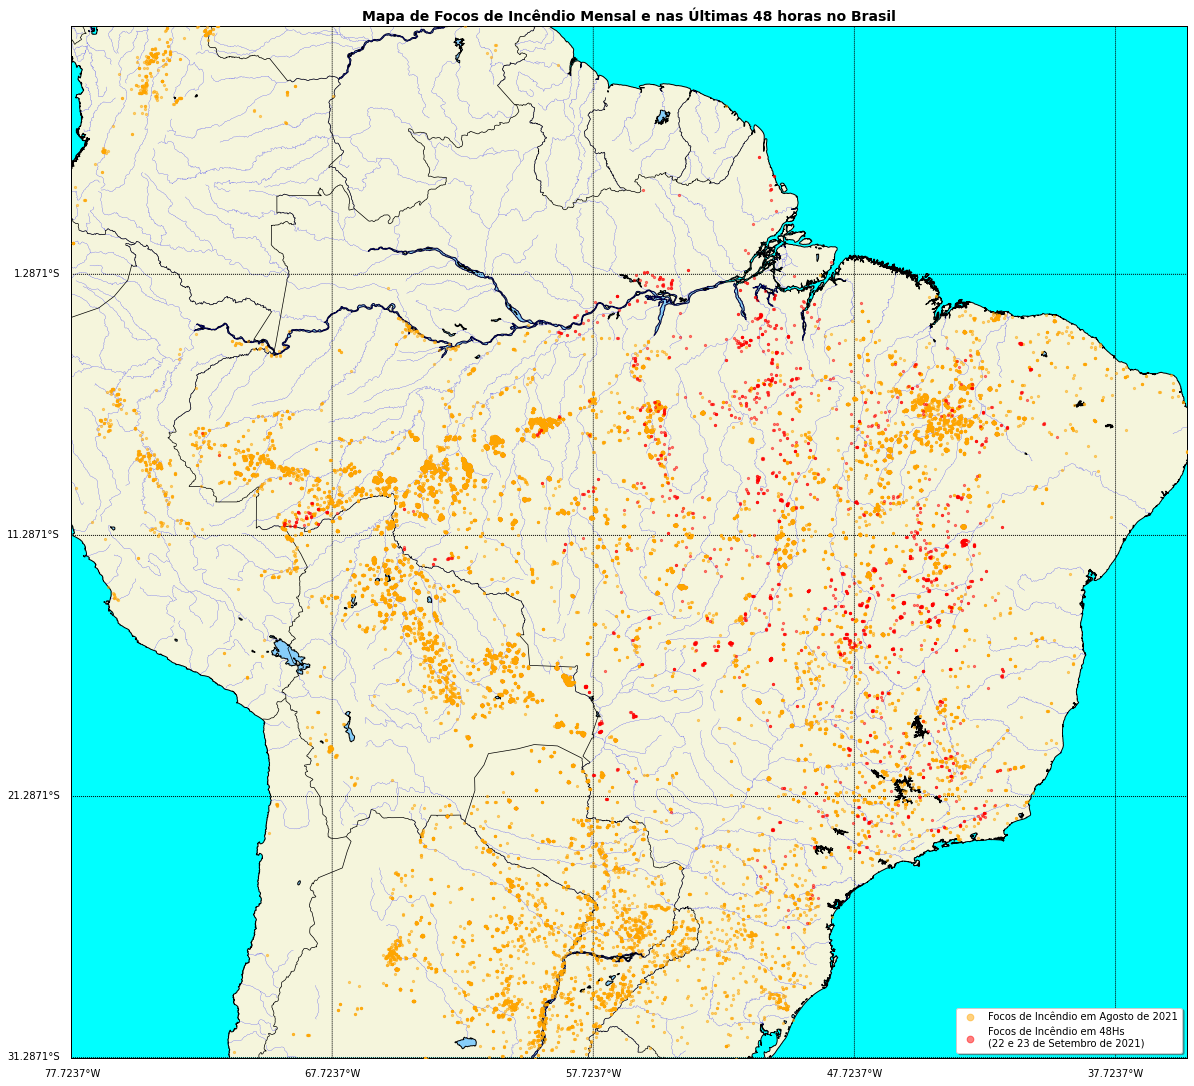

In [ ]:
map = plot_map(lat1, lat2, lon1, lon2, 20, 20)

plt.scatter(dados_mes['lon'].values,
            dados_mes['lat'].values,
            s = 5, c = 'orange',
            alpha = 0.5, zorder = 5, label = 'Focos de Incêndio em Agosto de 2021')

plt.scatter(dados['longitude'].values,
            dados['latitude'].values,
            s = 5, c = 'red',
            alpha = 0.5, zorder = 5, label = 'Focos de Incêndio em 48Hs \n(22 e 23 de Setembro de 2021)')

plt.title('Mapa de Focos de Incêndio Mensal e nas Últimas 48 horas no Brasil', 
          fontsize = 14, fontweight = 'bold')

plt.legend(loc = 4, shadow = 1, markerscale = 3)

plt.savefig('/content/drive/MyDrive/Colab Notebooks/mapaincendios_br.png')


